In [1]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

In [155]:
dataset = pd.read_csv('master_state_data.csv')
#View statistical details 
dataset.describe()

,Density,Pop,LandArea,gdpRank,stateGDP,score,Automobiles,Airports,total_test_results_04102020,positive_04102020,negative_04102020,deaths_04102020
count,50.000000,5.000000e+01,50.000000,50.00000,5.000000e+01,50.00000,5.000000e+01,50.000000,50.000000,50.000000,50.000000,50.000000
mean,203.900898,6.611966e+06,70636.920000,25.50000,4.122866e+05,3.70000,2.219378e+06,392.600000,50258.500000,9813.520000,40444.980000,368.080000
std,267.412842,7.480025e+06,85815.683884,14.57738,5.324388e+05,0.46291,2.538670e+06,318.021434,66317.036537,25065.161733,44626.969364,1133.982216
min,1.286300,5.670250e+05,1034.000000,1.00000,3.415400e+04,3.00000,1.734870e+05,22.000000,5056.000000,246.000000,4736.000000,0.000000
25%,47.706725,1.857760e+06,36741.000000,13.25000,9.542725e+04,3.00000,5.746115e+05,201.250000,14360.750000,1167.250000,12711.000000,23.000000
50%,107.783600,4.572438e+06,53891.500000,25.50000,2.387260e+05,4.00000,1.616773e+06,310.000000,30418.000000,2776.000000,25878.500000,84.000000
75%,219.566500,7.692445e+06,81226.000000,37.75000,5.425328e+05,4.00000,2.696930e+06,495.000000,58309.500000,9410.000000,51836.500000,287.500000
max,1215.199100,3.993749e+07,570641.000000,50.00000,3.018337e+06,4.00000,1.486097e+07,2031.000000,417885.000000,170512.000000,247373.000000,7844.000000


In [202]:
#Clean data and remove big hotspots..
dataset.isnull().any()
dataset = dataset.fillna(method='ffill')
dataset = dataset[dataset.STATE != "New York"]

#Divide data, choose subset of x variables baed off of adjusted R^2 values (performed in R)
X = dataset[['total_test_results_04102020','Airports','Pop','LandArea','Automobiles','score']]
y = dataset['positive_04102020']

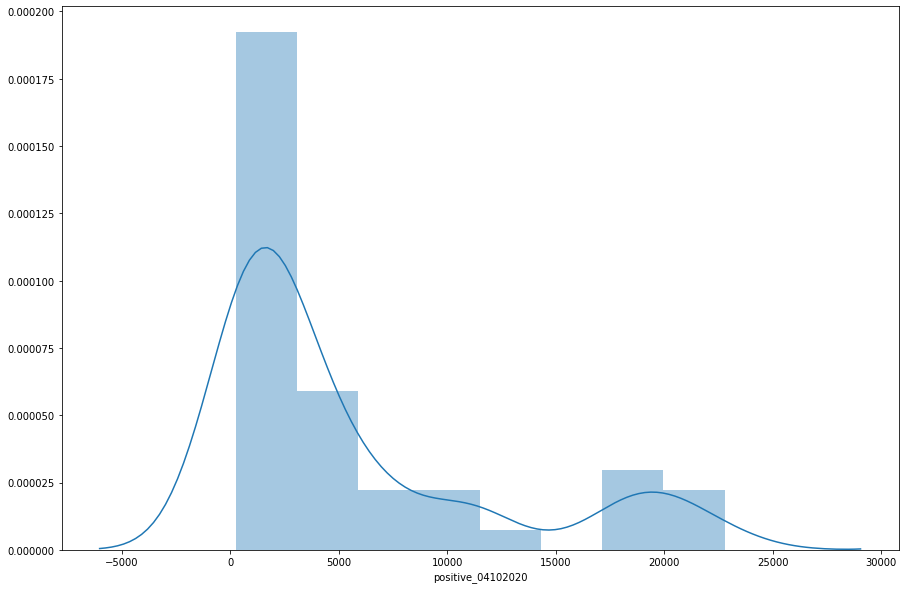

In [203]:
plt.figure(figsize=(15,10))
plt.tight_layout()
seabornInstance.distplot(dataset['positive_04102020'])

#Observe the most of the time, value lays around 2,500

In [199]:
#Train data 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

regressor = LinearRegression()
regressor.fit(X_train, y_train)

coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])  
coeff_df

,Coefficient
total_test_results_04102020,0.167863
Airports,3.152641
Pop,0.002364
LandArea,-0.007285
Automobiles,-0.007210
score,-1138.186652


In [204]:
y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual' : y_test, 'Predicted' : y_pred})
df

,Actual,Predicted
30,819.0,1837.778820
4,19472.0,16621.032365
27,3908.0,10925.037911
32,1091.0,3675.038650
35,5836.0,6218.715259
40,3065.0,4453.997113
37,1321.0,2950.853717
43,11671.0,33542.684959
8,1326.0,299.361937
11,442.0,1363.342024


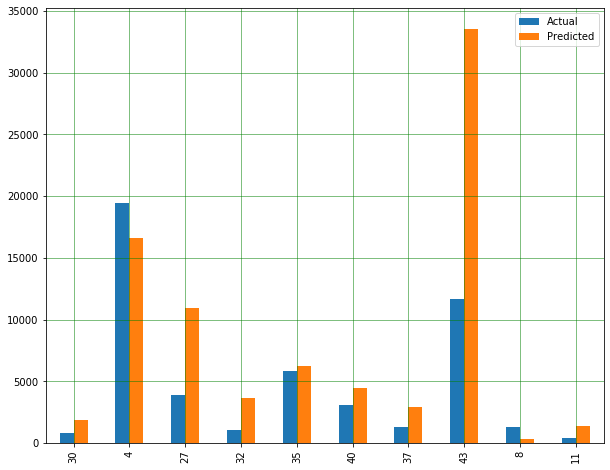

In [205]:
df.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [206]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

#Errors are pretty large, model doesn't accurately predict positive tested cases
#Could be due to needing more data in regards of travel, also could be made bad assumptions over linear relationships
#Also could just not have high enough correlation.. 

Mean Absolute Error: 4069.2054150652125
Mean Squared Error: 55008767.03995846
Root Mean Squared Error: 7416.789537256565
